1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy import stats
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import numpy.random as npr
npr.seed(123) # fix seed for reproducible result
from scipy.integrate import trapz

import statistics

%matplotlib inline

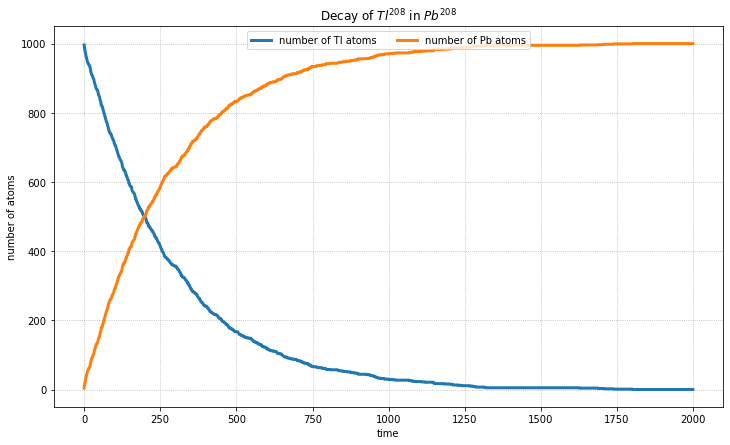

In [2]:
tau       = 3.052 * 60 #half life [s]
N_Tl      = 1000 #initial number of Tl
N_Pb      = 0 #initial number of Pb

time_step = 1
max_time  = 2000
p         = 1 - 2**(-1/tau) #probability of decay

Tl_list   = np.array([], dtype=int)
Pb_list   = np.array([], dtype=int)
time_list = np.arange(start=0, stop=max_time, step=time_step)

for t in time_list:
    for x in np.arange(N_Tl):
        if(np.random.rand() < p):
            N_Tl -= 1
            N_Pb += 1
    Tl_list   = np.append(Tl_list, N_Tl)
    Pb_list   = np.append(Pb_list, N_Pb)

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(time_list, Tl_list, lw=3, label='number of Tl atoms')
ax.plot(time_list, Pb_list, lw=3, label='number of Pb atoms')
ax.set_xlabel('time')
ax.set_ylabel('number of atoms')
ax.set_title('Decay of $Tl^{208}$ in $Pb^{208}$')
ax.legend(loc='upper center', ncol=2)
ax.grid(linestyle='dotted')
plt.show()

In [3]:
def expon_pdf(x, mu=np.log(2)/tau):
    """PDF of exponential distribution."""
    return mu*np.exp(-mu*x)

def expon_cdf(x, mu=np.log(2)/tau):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-mu*x)

def expon_icdf(z, mu=np.log(2)/tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-z)/mu

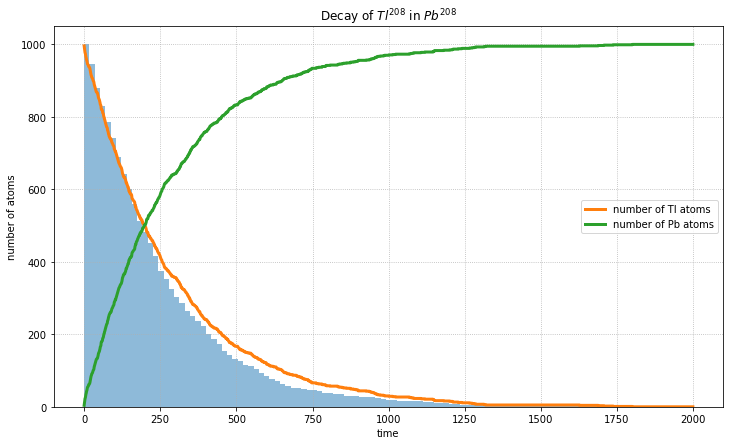

In [4]:
u = np.random.random(1000)
v = expon_icdf(u)

fig, ax = plt.subplots(figsize=(12,7))
ax.hist(v, bins=100, cumulative = -1, alpha=0.5) #cumulative=-1 to make inverse cumulative
ax.plot(time_list, Tl_list, lw=3, label='number of Tl atoms')
ax.plot(time_list, Pb_list, lw=3, label='number of Pb atoms')
ax.legend(loc='center right')
ax.set_xlabel('time')
ax.set_ylabel('number of atoms')
ax.set_title('Decay of $Tl^{208}$ in $Pb^{208}$')
ax.grid(linestyle='dotted')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [5]:
E         = 7.7e6#eV
a0        = 5.2917777210922e-11
sigma     = a0/100
N_alpha   = 10e6 #Number of alpha particles shot
Z         = 79 #gold atomic number
e         = 1.602e-19 #C
epsilon_0 = 8.85e-12 #F/m

mean      = (0,0)
cov       = [[sigma**2, 0],
             [0, sigma**2]]
X         = np.random.multivariate_normal(mean, cov, 10000) #beam 2d gaussian

b = (X[:,0]**2+X[:,1]**2)**0.5

theta = 2*np.arctan(Z*e/(2*np.pi*epsilon_0*E*b))
frac = theta[theta > np.pi/2].shape[0]/theta.shape[0]
print('Fraction of particle "bounced back" = ', frac)

Fraction of particle "bounced back" =  0.002


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

1.4505331367878012
1.45482
0.0029553707553983096


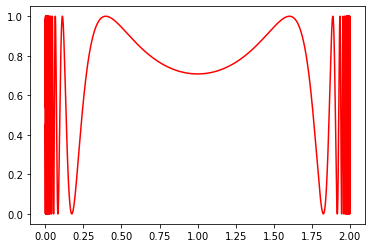

In [6]:
def f(x):
    return np.sin(1/(x*(2-x)))**2

N=100000
x=np.linspace(0.001,1.999,N)
plt.plot(x,f(x),'r-')
I_true = trapz(f(x),x) #computing with the best method i know
print(I_true)

count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print(I)
print(np.abs(I-I_true)/I_true)


In [7]:
x=np.linspace(0.001,1.999,N)
I=2*statistics.mean(f(x))
sigma = (statistics.stdev(f(x))/len(x))**0.5
print(I)
print((I-I_true)/I_true)
print(sigma)

1.4519796334789383
0.0009972172675354572
0.0016225913910521085


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [8]:
count=0
dim  =2
for i in range(N):
    X = np.random.rand(dim)
    if np.linalg.norm(X)<=1: count+=1

I=2**dim*count/N
print(I)

3.14548


In [9]:
count=0
dim  =10
for i in range(N):
    X = np.random.rand(dim)
    if np.linalg.norm(X)<=1: count+=1

I=2**dim*count/N
print(I)

2.53952


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [10]:
i = 2
N = 1000000
x = np.random.rand(N)

def f(x):
    return x**(-.5)/(np.exp(x)+1)

def w(x):
    return x**(-.5)

def invsq_pdf(x):
    return 1/(2*np.sqrt(x))

def invsq_cdf(x):
    return np.sqrt(x)

def invsq_icdf(z):
    return (z**2)

y=invsq_icdf(x)
I = i * sum(f(y)/w(y)) / N
print(I)

0.8389863273429122
